In [1]:
import h5py
import numpy as np
import os
from glob import glob
import SimpleITK as sitk
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from tqdm import tqdm

In [3]:
nii_path = '/braindat/lab/chenyd/DATASET/unlabel_data_niigz'
len(os.listdir(nii_path))

315

In [5]:
data_path = '/braindat/lab/chenyd/DATASET/unlabel_data'
data = sorted(glob(os.path.join(data_path, '*hdf')))
print(len(data))

316


In [2]:
kib_path = '/braindat/data_labeled/FIB-25'
kib_data = glob(os.path.join(kib_path, '*.hdf'))
kib_data.sort()

In [3]:
kib_data

['/braindat/data_labeled/FIB-25/trvol-250-1.hdf',
 '/braindat/data_labeled/FIB-25/trvol-250-2.hdf',
 '/braindat/data_labeled/FIB-25/tstvol-520-1.hdf',
 '/braindat/data_labeled/FIB-25/tstvol-520-2.hdf']

In [26]:
save_path = '/braindat/lab/chenyd/DATASET/unlabel_data'
for i in tqdm(kib_data):
    temp_data = h5py.File(i, 'r')
    temp_data = temp_data['volumes']
    temp_label = temp_data['labels']['neuron_ids'][:]
    temp_raw = temp_data['raw'][:]
    temp_name = i.split('/')[-2] +'_' + i.split('/')[-1].split('.')[0]
    # 保存temp_raw和temp_label
    with h5py.File(os.path.join(save_path,temp_name+'_raw.hdf'), 'w') as f:
        f.create_dataset('main', data=temp_raw)
    with h5py.File(os.path.join(save_path,temp_name+'_label.hdf'), 'w') as f:
        f.create_dataset('main', data=temp_label)
    

100%|██████████| 4/4 [00:22<00:00,  5.63s/it]


In [24]:
# 保存hdf文件
data = temp_label
with h5py.File(os.path.join(save_path,temp_name+'_label.hdf'), 'w') as f:
    f.create_dataset('label', data=data)
    

'FIB-25_tstvol-520-2'

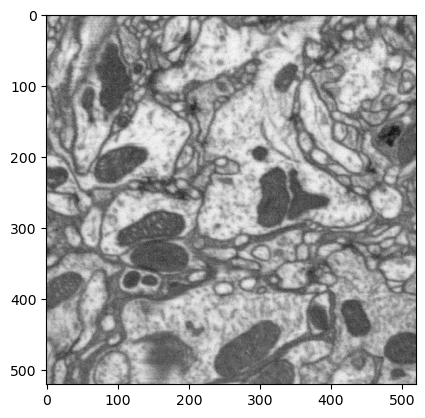

In [19]:
plt.imshow(temp_raw[:, :, 0], cmap='gray')

In [27]:
save_data = h5py.File(os.path.join(save_path,temp_name+'_label.hdf'), 'a')

In [31]:
save_data['main'][:].shape

(520, 520, 520)

In [32]:
zebrafinch_path = '/braindat/data_labeled/zebrafinch'
zebrafinch_data = glob(os.path.join(zebrafinch_path, '*.hdf'))

In [44]:
for i in tqdm(zebrafinch_data):
    temp_data = h5py.File(i, 'r')
    temp_data = temp_data['volumes']
    temp_label = temp_data['labels']['neuron_ids'][:]
    temp_raw = temp_data['raw'][:]
    temp_name = i.split('/')[-2] +'_' + i.split('/')[-1].split('.')[0]
    print(temp_name)
    print(temp_raw.shape, temp_label.shape)
    with h5py.File(os.path.join(save_path,temp_name+'_raw.hdf'), 'w') as f:
        f.create_dataset('main', data=temp_raw)
    with h5py.File(os.path.join(save_path,temp_name+'_label.hdf'), 'w') as f:
        f.create_dataset('main', data=temp_label)
    

  0%|          | 0/33 [00:00<?, ?it/s]

zebrafinch_gt_z3456-3606_y3188-3338_x4043-4193
(350, 550, 550) (150, 150, 150)


  6%|▌         | 2/33 [00:03<00:56,  1.82s/it]

zebrafinch_gt_z3608-3758_y3829-3979_x3423-3573
(350, 550, 550) (150, 150, 150)
zebrafinch_gt_z2934-3084_y5115-5265_x5140-5290
(350, 550, 550) (150, 150, 150)


  9%|▉         | 3/33 [00:05<00:53,  1.79s/it]

zebrafinch_gt_z4102-4252_y6330-6480_x1899-2049
(350, 550, 550) (150, 150, 150)


 15%|█▌        | 5/33 [00:08<00:47,  1.70s/it]

zebrafinch_gt_z3436-3586_y599-749_x2779-2929
(350, 550, 550) (150, 150, 150)
zebrafinch_gt_z3702-3852_y9605-9755_x2244-2394
(350, 550, 550) (150, 150, 150)


 21%|██        | 7/33 [00:12<00:44,  1.69s/it]

zebrafinch_gt_z3126-3276_y6857-7007_x5694-5844
(350, 550, 550) (150, 150, 150)
zebrafinch_gt_z2874-3024_y5707-5857_x5304-5454
(350, 550, 550) (150, 150, 150)


 27%|██▋       | 9/33 [00:15<00:41,  1.72s/it]

zebrafinch_gt_z4905-5055_y928-1078_x1729-1879
(350, 550, 550) (150, 150, 150)
zebrafinch_gt_z3722-3872_y4548-4698_x2879-3029
(350, 550, 550) (150, 150, 150)


 33%|███▎      | 11/33 [00:18<00:36,  1.66s/it]

zebrafinch_gt_z3596-3746_y3888-4038_x3661-3811
(350, 550, 550) (150, 150, 150)
zebrafinch_gt_z3914-4064_y9035-9185_x2573-2723
(350, 550, 550) (150, 150, 150)


 39%|███▉      | 13/33 [00:22<00:33,  1.66s/it]

zebrafinch_gt_z3438-3588_y2775-2925_x3476-3626
(350, 550, 550) (150, 150, 150)


 42%|████▏     | 14/33 [00:23<00:32,  1.70s/it]

zebrafinch_gt_z734-884_y9561-9711_x563-713
(350, 550, 550) (150, 150, 150)
zebrafinch_gt_z2834-2984_y5311-5461_x5077-5227
(350, 550, 550) (150, 150, 150)


 48%|████▊     | 16/33 [00:27<00:29,  1.72s/it]

zebrafinch_gt_z2868-3018_y5744-5894_x5157-5307
(350, 550, 550) (150, 150, 150)
zebrafinch_gt_z4440-4590_y7294-7444_x2350-2500
(350, 550, 550) (150, 150, 150)


 55%|█████▍    | 18/33 [00:30<00:26,  1.77s/it]

zebrafinch_gt_z3734-3884_y4315-4465_x2209-2359
(350, 550, 550) (150, 150, 150)
zebrafinch_gt_z5001-5151_y9426-9576_x2197-2347
(350, 550, 550) (150, 150, 150)


 61%|██████    | 20/33 [00:34<00:22,  1.72s/it]

zebrafinch_gt_z4801-4951_y10154-10304_x1972-2122
(350, 550, 550) (150, 150, 150)


 64%|██████▎   | 21/33 [00:36<00:22,  1.86s/it]

zebrafinch_gt_z255-383_y1407-1663_x1535-1791
(328, 656, 656) (128, 256, 256)
zebrafinch_gt_z3492-3642_y7888-8038_x8374-8524
(350, 550, 550) (150, 150, 150)


 70%|██████▉   | 23/33 [00:39<00:17,  1.79s/it]

zebrafinch_gt_z3096-3246_y5954-6104_x5813-5963
(350, 550, 550) (150, 150, 150)
zebrafinch_gt_z3710-3860_y8691-8841_x2889-3039
(350, 550, 550) (150, 150, 150)


 76%|███████▌  | 25/33 [00:43<00:13,  1.71s/it]

zebrafinch_gt_z4312-4462_y9341-9491_x2419-2569
(350, 550, 550) (150, 150, 150)
zebrafinch_gt_z2559-2687_y4991-5247_x4863-5119
(328, 656, 656) (128, 256, 256)


 82%|████████▏ | 27/33 [00:47<00:10,  1.80s/it]

zebrafinch_gt_z3118-3268_y6538-6688_x6100-6250
(350, 550, 550) (150, 150, 150)
zebrafinch_gt_z5119-5247_y1023-1279_x1663-1919
(328, 656, 656) (128, 256, 256)


 85%|████████▍ | 28/33 [00:49<00:09,  1.98s/it]

zebrafinch_gt_z3604-3754_y4101-4251_x3493-3643
(350, 550, 550) (150, 150, 150)


 91%|█████████ | 30/33 [00:52<00:05,  1.85s/it]

zebrafinch_gt_z3492-3642_y841-991_x381-531
(350, 550, 550) (150, 150, 150)
zebrafinch_gt_z4951-5101_y9415-9565_x2272-2422
(350, 550, 550) (150, 150, 150)


 94%|█████████▍| 31/33 [00:54<00:03,  1.83s/it]

zebrafinch_gt_z2815-2943_y5631-5887_x4607-4863
(328, 656, 656) (128, 256, 256)


100%|██████████| 33/33 [00:58<00:00,  1.78s/it]

zebrafinch_gt_z5405-5555_y10490-10640_x3406-3556
(350, 550, 550) (150, 150, 150)


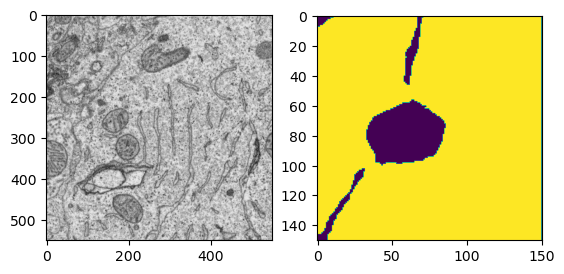

In [42]:
plt.subplot(1,2,1)
plt.imshow(temp_raw[0,:,:], cmap='gray')
plt.subplot(1,2,2)
#temp_label = np.pad(temp_label, ((0,0),(0,0),(0,1)), 'constant', constant_values=0)
plt.imshow(temp_label[0,:,:])

In [48]:
fafb_path = '/braindat/FAFB/niigz_selected_block/nii.gz'
fafb_data = glob(os.path.join(fafb_path, '*.nii.gz'))
fafb_data.sort()
# 读取niigz文件
for i in tqdm(fafb_data):
    temp_data = sitk.ReadImage(i)
    temp_raw = sitk.GetArrayFromImage(temp_data)
    temp_name = 'FAFB_' + i.split('/')[-1].split('.')[0]
    print(temp_name)
    print(temp_raw.shape)
    with h5py.File(os.path.join(save_path,temp_name+'_raw.hdf'), 'w') as f:
        f.create_dataset('main', data=temp_raw)

  0%|          | 0/119 [00:00<?, ?it/s]

FAFB_raw_without_artifact_101_9_21
(84, 2048, 2048)


  1%|          | 1/119 [00:03<07:34,  3.85s/it]

FAFB_raw_without_artifact_102_9_21
(84, 2048, 2048)


  2%|▏         | 2/119 [00:08<08:12,  4.21s/it]

FAFB_raw_without_artifact_103_9_21
(84, 2048, 2048)


  3%|▎         | 3/119 [00:12<08:33,  4.43s/it]

FAFB_raw_without_artifact_104_9_21
(84, 2048, 2048)


  4%|▍         | 5/119 [00:22<08:29,  4.47s/it]

FAFB_raw_without_artifact_105_9_21
(84, 2048, 2048)
FAFB_raw_without_artifact_106_9_21
(84, 2048, 2048)


  6%|▌         | 7/119 [00:30<08:16,  4.43s/it]

FAFB_raw_without_artifact_107_9_21
(84, 2048, 2048)
FAFB_raw_without_artifact_108_9_21
(84, 2048, 2048)


  7%|▋         | 8/119 [00:35<08:05,  4.37s/it]

FAFB_raw_without_artifact_109_9_21
(84, 2048, 2048)


  8%|▊         | 9/119 [00:39<08:03,  4.40s/it]

FAFB_raw_without_artifact_110_9_21
(84, 2048, 2048)


  9%|▉         | 11/119 [00:47<07:41,  4.27s/it]

FAFB_raw_without_artifact_116_15_24
(84, 2048, 2048)
FAFB_raw_without_artifact_117_15_24
(84, 2048, 2048)


 10%|█         | 12/119 [00:52<07:35,  4.25s/it]

FAFB_raw_without_artifact_118_15_24
(84, 2048, 2048)


 12%|█▏        | 14/119 [01:00<07:16,  4.16s/it]

FAFB_raw_without_artifact_119_15_24
(84, 2048, 2048)
FAFB_raw_without_artifact_120_15_24
(84, 2048, 2048)


 13%|█▎        | 15/119 [01:04<07:06,  4.10s/it]

FAFB_raw_without_artifact_121_15_24
(84, 2048, 2048)


 13%|█▎        | 16/119 [01:08<06:58,  4.06s/it]

FAFB_raw_without_artifact_122_15_24
(84, 2048, 2048)


 14%|█▍        | 17/119 [01:12<06:55,  4.07s/it]

FAFB_raw_without_artifact_123_15_24
(84, 2048, 2048)


 15%|█▌        | 18/119 [01:16<06:59,  4.15s/it]

FAFB_raw_without_artifact_124_15_24
(84, 2048, 2048)


 16%|█▌        | 19/119 [01:21<07:01,  4.21s/it]

FAFB_raw_without_artifact_125_15_24
(84, 2048, 2048)


 17%|█▋        | 20/119 [01:25<06:57,  4.22s/it]

FAFB_raw_without_artifact_126_11_27
(84, 2048, 2048)


 18%|█▊        | 22/119 [01:33<06:52,  4.25s/it]

FAFB_raw_without_artifact_126_8_28
(84, 2048, 2048)
FAFB_raw_without_artifact_127_11_27
(84, 2048, 2048)


 19%|█▉        | 23/119 [01:38<06:47,  4.24s/it]

FAFB_raw_without_artifact_127_8_28
(84, 2048, 2048)


 20%|██        | 24/119 [01:42<06:55,  4.37s/it]

FAFB_raw_without_artifact_128_11_27
(84, 2048, 2048)


 21%|██        | 25/119 [01:47<06:55,  4.43s/it]

FAFB_raw_without_artifact_128_13_34
(84, 2048, 2048)


 22%|██▏       | 26/119 [01:51<06:56,  4.48s/it]

FAFB_raw_without_artifact_128_8_28
(84, 2048, 2048)


 23%|██▎       | 27/119 [01:56<06:53,  4.49s/it]

FAFB_raw_without_artifact_129_11_27
(84, 2048, 2048)


 24%|██▎       | 28/119 [02:00<06:45,  4.46s/it]

FAFB_raw_without_artifact_129_11_31
(84, 2048, 2048)


 25%|██▌       | 30/119 [02:09<06:23,  4.31s/it]

FAFB_raw_without_artifact_129_13_34
(84, 2048, 2048)
FAFB_raw_without_artifact_129_8_28
(84, 2048, 2048)


 26%|██▌       | 31/119 [02:13<06:23,  4.36s/it]

FAFB_raw_without_artifact_130_11_27
(84, 2048, 2048)


 27%|██▋       | 32/119 [02:17<06:13,  4.30s/it]

FAFB_raw_without_artifact_130_11_31
(84, 2048, 2048)


 28%|██▊       | 33/119 [02:22<06:14,  4.35s/it]

FAFB_raw_without_artifact_130_13_34
(84, 2048, 2048)


 29%|██▊       | 34/119 [02:26<06:09,  4.35s/it]

FAFB_raw_without_artifact_130_8_28
(84, 2048, 2048)


 29%|██▉       | 35/119 [02:30<06:05,  4.35s/it]

FAFB_raw_without_artifact_131_11_27
(84, 2048, 2048)


 30%|███       | 36/119 [02:35<06:00,  4.35s/it]

FAFB_raw_without_artifact_131_11_31
(84, 2048, 2048)


 31%|███       | 37/119 [02:39<05:52,  4.30s/it]

FAFB_raw_without_artifact_131_13_34
(84, 2048, 2048)


 32%|███▏      | 38/119 [02:43<05:53,  4.36s/it]

FAFB_raw_without_artifact_131_8_28
(84, 2048, 2048)


 33%|███▎      | 39/119 [02:48<05:58,  4.49s/it]

FAFB_raw_without_artifact_132_11_27
(84, 2048, 2048)


 34%|███▎      | 40/119 [02:53<06:01,  4.57s/it]

FAFB_raw_without_artifact_132_11_31
(84, 2048, 2048)


 34%|███▍      | 41/119 [02:58<05:57,  4.59s/it]

FAFB_raw_without_artifact_132_13_34
(84, 2048, 2048)


 35%|███▌      | 42/119 [03:03<06:13,  4.84s/it]

FAFB_raw_without_artifact_132_14_10
(84, 2048, 2048)


 36%|███▌      | 43/119 [03:08<06:04,  4.80s/it]

FAFB_raw_without_artifact_132_8_28
(84, 2048, 2048)


 37%|███▋      | 44/119 [03:12<05:49,  4.66s/it]

FAFB_raw_without_artifact_133_11_31
(84, 2048, 2048)


 38%|███▊      | 45/119 [03:17<05:44,  4.66s/it]

FAFB_raw_without_artifact_133_13_34
(84, 2048, 2048)


 39%|███▊      | 46/119 [03:21<05:37,  4.62s/it]

FAFB_raw_without_artifact_133_14_10
(84, 2048, 2048)


 39%|███▉      | 47/119 [03:26<05:23,  4.50s/it]

FAFB_raw_without_artifact_133_8_28
(84, 2048, 2048)


 40%|████      | 48/119 [03:30<05:11,  4.39s/it]

FAFB_raw_without_artifact_134_11_27
(84, 2048, 2048)


 41%|████      | 49/119 [03:34<05:04,  4.36s/it]

FAFB_raw_without_artifact_134_11_31
(84, 2048, 2048)


 42%|████▏     | 50/119 [03:38<05:01,  4.37s/it]

FAFB_raw_without_artifact_134_13_34
(84, 2048, 2048)


 43%|████▎     | 51/119 [03:43<04:58,  4.39s/it]

FAFB_raw_without_artifact_134_14_10
(84, 2048, 2048)


 44%|████▎     | 52/119 [03:47<04:49,  4.32s/it]

FAFB_raw_without_artifact_134_8_28
(84, 2048, 2048)


 45%|████▍     | 53/119 [03:51<04:47,  4.36s/it]

FAFB_raw_without_artifact_135_11_27
(84, 2048, 2048)


 45%|████▌     | 54/119 [03:56<04:48,  4.44s/it]

FAFB_raw_without_artifact_135_11_31
(84, 2048, 2048)


 46%|████▌     | 55/119 [04:01<04:47,  4.49s/it]

FAFB_raw_without_artifact_135_13_30
(84, 2048, 2048)


 47%|████▋     | 56/119 [04:05<04:47,  4.56s/it]

FAFB_raw_without_artifact_135_13_34
(84, 2048, 2048)


 48%|████▊     | 57/119 [04:10<04:43,  4.58s/it]

FAFB_raw_without_artifact_135_14_10
(84, 2048, 2048)


 49%|████▊     | 58/119 [04:14<04:35,  4.52s/it]

FAFB_raw_without_artifact_135_8_28
(84, 2048, 2048)


 50%|████▉     | 59/119 [04:19<04:31,  4.52s/it]

FAFB_raw_without_artifact_136_11_31
(84, 2048, 2048)


 50%|█████     | 60/119 [04:23<04:25,  4.50s/it]

FAFB_raw_without_artifact_136_13_30
(84, 2048, 2048)


 51%|█████▏    | 61/119 [04:28<04:19,  4.47s/it]

FAFB_raw_without_artifact_136_13_34
(84, 2048, 2048)


 53%|█████▎    | 63/119 [04:37<04:07,  4.42s/it]

FAFB_raw_without_artifact_136_14_10
(84, 2048, 2048)
FAFB_raw_without_artifact_136_9_25
(84, 2048, 2048)


 54%|█████▍    | 64/119 [04:41<04:06,  4.48s/it]

FAFB_raw_without_artifact_137_11_31
(84, 2048, 2048)


 55%|█████▍    | 65/119 [04:46<04:04,  4.53s/it]

FAFB_raw_without_artifact_137_13_30
(84, 2048, 2048)


 55%|█████▌    | 66/119 [04:50<04:01,  4.55s/it]

FAFB_raw_without_artifact_137_13_34
(84, 2048, 2048)


 56%|█████▋    | 67/119 [04:55<04:00,  4.62s/it]

FAFB_raw_without_artifact_137_14_10
(84, 2048, 2048)


 57%|█████▋    | 68/119 [05:00<03:56,  4.63s/it]

FAFB_raw_without_artifact_137_9_25
(84, 2048, 2048)


 58%|█████▊    | 69/119 [05:04<03:50,  4.61s/it]

FAFB_raw_without_artifact_138_11_31
(84, 2048, 2048)


 59%|█████▉    | 70/119 [05:09<03:40,  4.50s/it]

FAFB_raw_without_artifact_138_13_30
(84, 2048, 2048)


 60%|█████▉    | 71/119 [05:13<03:40,  4.60s/it]

FAFB_raw_without_artifact_138_14_10
(84, 2048, 2048)


 61%|██████    | 72/119 [05:18<03:29,  4.47s/it]

FAFB_raw_without_artifact_138_9_25
(84, 2048, 2048)


 61%|██████▏   | 73/119 [05:22<03:28,  4.54s/it]

FAFB_raw_without_artifact_139_13_30
(84, 2048, 2048)


 62%|██████▏   | 74/119 [05:27<03:25,  4.56s/it]

FAFB_raw_without_artifact_139_14_10
(84, 2048, 2048)


 63%|██████▎   | 75/119 [05:31<03:19,  4.53s/it]

FAFB_raw_without_artifact_139_9_25
(84, 2048, 2048)


 64%|██████▍   | 76/119 [05:36<03:15,  4.54s/it]

FAFB_raw_without_artifact_140_13_30
(84, 2048, 2048)


 65%|██████▍   | 77/119 [05:41<03:13,  4.60s/it]

FAFB_raw_without_artifact_140_14_10
(84, 2048, 2048)


 66%|██████▌   | 78/119 [05:45<03:08,  4.60s/it]

FAFB_raw_without_artifact_140_9_25
(84, 2048, 2048)


 66%|██████▋   | 79/119 [05:50<03:07,  4.69s/it]

FAFB_raw_without_artifact_141_13_30
(84, 2048, 2048)


 67%|██████▋   | 80/119 [05:55<03:00,  4.62s/it]

FAFB_raw_without_artifact_141_14_10
(84, 2048, 2048)


 68%|██████▊   | 81/119 [05:59<02:55,  4.61s/it]

FAFB_raw_without_artifact_141_9_25
(84, 2048, 2048)


 69%|██████▉   | 82/119 [06:04<02:52,  4.67s/it]

FAFB_raw_without_artifact_142_13_30
(84, 2048, 2048)


 70%|██████▉   | 83/119 [06:09<02:51,  4.77s/it]

FAFB_raw_without_artifact_142_9_25
(84, 2048, 2048)


 71%|███████   | 84/119 [06:14<02:49,  4.83s/it]

FAFB_raw_without_artifact_143_13_30
(84, 2048, 2048)


 71%|███████▏  | 85/119 [06:19<02:43,  4.82s/it]

FAFB_raw_without_artifact_143_9_25
(84, 2048, 2048)


 72%|███████▏  | 86/119 [06:24<02:40,  4.86s/it]

FAFB_raw_without_artifact_144_13_30
(84, 2048, 2048)


 73%|███████▎  | 87/119 [06:28<02:32,  4.76s/it]

FAFB_raw_without_artifact_144_9_25
(84, 2048, 2048)


 74%|███████▍  | 88/119 [06:33<02:28,  4.78s/it]

FAFB_raw_without_artifact_145_9_25
(84, 2048, 2048)


 76%|███████▌  | 90/119 [06:43<02:19,  4.80s/it]

FAFB_raw_without_artifact_155_7_16
(84, 2048, 2048)
FAFB_raw_without_artifact_156_7_16
(84, 2048, 2048)


 76%|███████▋  | 91/119 [06:48<02:13,  4.77s/it]

FAFB_raw_without_artifact_157_7_16
(84, 2048, 2048)


 77%|███████▋  | 92/119 [06:52<02:06,  4.69s/it]

FAFB_raw_without_artifact_158_7_16
(84, 2048, 2048)


 78%|███████▊  | 93/119 [06:56<02:00,  4.62s/it]

FAFB_raw_without_artifact_159_7_16
(84, 2048, 2048)


 79%|███████▉  | 94/119 [07:01<01:55,  4.60s/it]

FAFB_raw_without_artifact_160_7_16
(84, 2048, 2048)


 80%|███████▉  | 95/119 [07:06<01:53,  4.72s/it]

FAFB_raw_without_artifact_161_7_16
(84, 2048, 2048)


 81%|████████  | 96/119 [07:11<01:49,  4.75s/it]

FAFB_raw_without_artifact_162_7_16
(84, 2048, 2048)


 82%|████████▏ | 97/119 [07:16<01:44,  4.74s/it]

FAFB_raw_without_artifact_163_13_18
(84, 2048, 2048)


 82%|████████▏ | 98/119 [07:21<01:40,  4.81s/it]

FAFB_raw_without_artifact_163_7_16
(84, 2048, 2048)


 83%|████████▎ | 99/119 [07:25<01:35,  4.79s/it]

FAFB_raw_without_artifact_164_13_18
(84, 2048, 2048)


 84%|████████▍ | 100/119 [07:30<01:30,  4.76s/it]

FAFB_raw_without_artifact_164_7_16
(84, 2048, 2048)


 85%|████████▍ | 101/119 [07:34<01:24,  4.68s/it]

FAFB_raw_without_artifact_165_13_18
(84, 2048, 2048)


 86%|████████▌ | 102/119 [07:39<01:19,  4.65s/it]

FAFB_raw_without_artifact_166_13_18
(84, 2048, 2048)


 87%|████████▋ | 103/119 [07:44<01:13,  4.62s/it]

FAFB_raw_without_artifact_167_13_18
(84, 2048, 2048)


 88%|████████▊ | 105/119 [07:53<01:05,  4.67s/it]

FAFB_raw_without_artifact_168_12_13
(84, 2048, 2048)
FAFB_raw_without_artifact_168_13_18
(84, 2048, 2048)


 89%|████████▉ | 106/119 [07:57<00:59,  4.60s/it]

FAFB_raw_without_artifact_169_12_13
(84, 2048, 2048)


 90%|████████▉ | 107/119 [08:02<00:54,  4.56s/it]

FAFB_raw_without_artifact_169_13_18
(84, 2048, 2048)


 91%|█████████ | 108/119 [08:08<00:56,  5.16s/it]

FAFB_raw_without_artifact_170_12_13
(84, 2048, 2048)


 92%|█████████▏| 109/119 [08:13<00:50,  5.09s/it]

FAFB_raw_without_artifact_170_13_18
(84, 2048, 2048)


 92%|█████████▏| 110/119 [08:18<00:44,  4.94s/it]

FAFB_raw_without_artifact_171_12_13
(84, 2048, 2048)


 93%|█████████▎| 111/119 [08:23<00:38,  4.82s/it]

FAFB_raw_without_artifact_171_13_18
(84, 2048, 2048)


 94%|█████████▍| 112/119 [08:27<00:33,  4.80s/it]

FAFB_raw_without_artifact_172_12_13
(84, 2048, 2048)


 95%|█████████▍| 113/119 [08:33<00:30,  5.04s/it]

FAFB_raw_without_artifact_172_13_18
(84, 2048, 2048)


 96%|█████████▌| 114/119 [08:38<00:25,  5.04s/it]

FAFB_raw_without_artifact_173_12_13
(84, 2048, 2048)


 97%|█████████▋| 115/119 [08:42<00:19,  4.88s/it]

FAFB_raw_without_artifact_174_12_13
(84, 2048, 2048)


 97%|█████████▋| 116/119 [08:48<00:14,  4.97s/it]

FAFB_raw_without_artifact_175_12_13
(84, 2048, 2048)


 99%|█████████▉| 118/119 [08:57<00:04,  4.92s/it]

FAFB_raw_without_artifact_176_12_13
(84, 2048, 2048)
FAFB_raw_without_artifact_177_12_13
(84, 2048, 2048)


100%|██████████| 119/119 [09:02<00:00,  4.56s/it]


In [47]:
save_path

'/braindat/lab/chenyd/DATASET/unlabel_data'

In [55]:
mito_data = sorted(glob(save_path + '/Mi*'))

In [56]:
mito_data

['/braindat/lab/chenyd/DATASET/unlabel_data/MitoEM_human_0_raw.hdf',
 '/braindat/lab/chenyd/DATASET/unlabel_data/MitoEM_human_1_raw.hdf']

In [57]:
for i in mito_data:
    temp_data = h5py.File(i, 'r')
    temp_data = temp_data['main'][:]
    print(temp_data.shape)
    break

(100, 4096, 4096)


In [17]:
import os
import h5py
import numpy as np
from glob import glob
from tqdm import tqdm
from matplotlib import pyplot as plt

In [8]:
save_path = '/braindat/lab/chenyd/DATASET/unlabel_data'
mito_rat = sorted(glob(save_path + '/Mi*rat*'))
fafb = sorted(glob(save_path + '/FAFB*'))

In [26]:
for i in mito_rat:
    hdf_data = h5py.File(i, 'r+')
    temp_data = hdf_data['main'][:]
    temp_data = temp_data.astype(np.uint8)
    del hdf_data['main']
    hdf_data.create_dataset('main', data=temp_data)
    print(temp_data.shape)
    break

(50, 2048, 2048)


In [29]:
data_path = '/braindat/lab/chenyd/DATASET/unlabel_data'
data_list = glob(data_path + '/*.hdf')

In [31]:
len(data_list)

283

In [32]:
data_mito_rat = h5py.File(i, 'r')
data_mito_rat = data_mito_rat['main'][:]
data_mito_rat[0]

array([[ 59,  69,  59, ..., 173, 202, 210],
       [ 28,  35,  11, ..., 170, 190, 207],
       [ 33,  19,  13, ..., 203, 192, 209],
       ...,
       [208, 193, 216, ...,   8,  33,  20],
       [216, 222, 239, ...,  10,  32,  21],
       [190, 223, 224, ...,  21,  31,  41]], dtype=uint8)

In [36]:
data_mito_rat.dtype == np.uint8

True

In [9]:
for i in fafb:
    temp_fafb = h5py.File(i, 'r')
    temp_fafb = temp_fafb['main'][:]
    print(temp_fafb.shape)
    break

(84, 2048, 2048)


In [25]:
import h5py
for i in mito_rat:
    # Open the hdf file
    hdf_file = h5py.File(i, "r+")

    # Get the dataset you want to change
    dataset = hdf_file["main"]

    # Create a new dataset with the desired type and the same name
    dataset[...] = dataset[...].astype("uint8")
    hdf_file["main"] = dataset
    # Close the hdf file
    hdf_file.close()
    break


OSError: Unable to create link (name already exists)

In [24]:
data_mito_rat = h5py.File(i, 'r')
data_mito_rat = data_mito_rat['main'][:]
data_mito_rat[0]

array([[ 59.,  69.,  59., ..., 173., 202., 210.],
       [ 28.,  35.,  11., ..., 170., 190., 207.],
       [ 33.,  19.,  13., ..., 203., 192., 209.],
       ...,
       [208., 193., 216., ...,   8.,  33.,  20.],
       [216., 222., 239., ...,  10.,  32.,  21.],
       [190., 223., 224., ...,  21.,  31.,  41.]])

In [10]:
temp_fafb[0]

array([[188, 190, 193, ..., 110, 115, 100],
       [191, 190, 195, ..., 115, 130, 136],
       [192, 189, 198, ..., 173, 179, 173],
       ...,
       [121, 120, 102, ...,  84, 114, 167],
       [150, 116, 125, ...,  95,  87, 131],
       [182, 132, 143, ..., 121,  94, 132]], dtype=uint8)

In [11]:
temp_data[0]

array([[ 59.,  69.,  59., ..., 173., 202., 210.],
       [ 28.,  35.,  11., ..., 170., 190., 207.],
       [ 33.,  19.,  13., ..., 203., 192., 209.],
       ...,
       [208., 193., 216., ...,   8.,  33.,  20.],
       [216., 222., 239., ...,  10.,  32.,  21.],
       [190., 223., 224., ...,  21.,  31.,  41.]])

In [1]:
import h5py 
import os
import numpy as np
from glob import glob
from tqdm import tqdm

In [30]:
data_path = '/braindat/lab/chenyd/DATASET/unlabel_data'
data_dir = glob(data_path + '/FA*')
print(len(data_dir))
# for i in tqdm(data_dir):
#     # 删除
#     os.remove(i)
for i in data_dir[:10]:
    temp_data = h5py.File(i, 'r')
    temp_data = temp_data['main'][:]
    print(temp_data.shape)
    

119
(84, 2048, 2048)
(84, 2048, 2048)
(84, 2048, 2048)
(84, 2048, 2048)
(84, 2048, 2048)
(84, 2048, 2048)
(84, 2048, 2048)
(84, 2048, 2048)
(84, 2048, 2048)
(84, 2048, 2048)


In [36]:
# 统计文件夹大小
import os
import sys
def getDirSize(dir):
    for root, dirs, files in os.walk(dir):
        size = 0
        for f in files:
            size += os.path.getsize(os.path.join(root, f))
        return size
print(getDirSize('/braindat/FAFB/data'))

0


In [35]:
79076462248 / 1e9

79.076462248

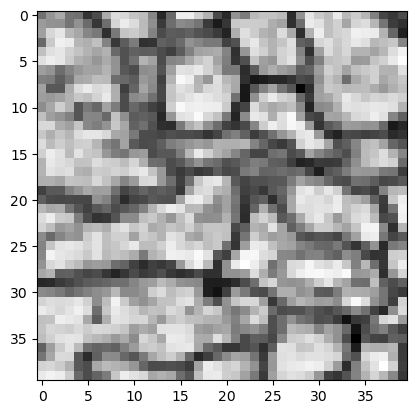

In [33]:
from matplotlib import pyplot as plt
plt.imshow(temp_data[0,:40,:40],cmap='gray')

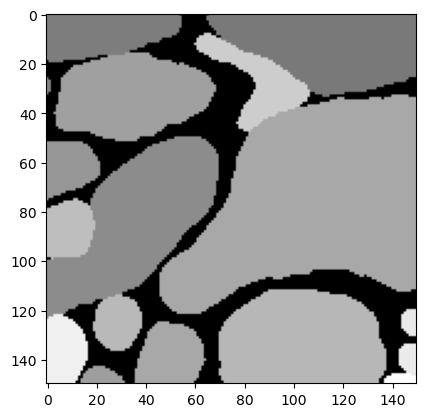

In [4]:
from matplotlib import pyplot as plt

plt.imshow(temp_data[0], cmap='gray')

In [6]:
temp_data[0]

array([[ 50,  50,  50, ...,  49,  49,  49],
       [ 50,  50,  50, ...,  49,  49,  49],
       [ 50,  50,  50, ...,  49,  49,  49],
       ...,
       [ 96,  96,  96, ..., 102, 102, 102],
       [ 96,  96,  96, ..., 102, 102, 102],
       [ 96,  96,  96, ..., 102, 102, 102]], dtype=uint8)

In [5]:
import os
import shutil
from glob import glob
from tqdm import tqdm

data_path = '/braindat/lab/chenyd/DATASET/unlabel_data/original_data'
if not os.path.exists(data_path):
    os.mkdir(data_path)

origin_data_path = '/braindat/original'

# 复制目录下的所有文件
data_dir = glob(origin_data_path + '/*')

for i in tqdm(data_dir):
    if not i.endswith('.tar'):
        shutil.copytree(i, os.path.join(data_path, i.split('/')[-1]))


  0%|          | 0/23 [00:00<?, ?it/s]

In [3]:
data_dir

['/braindat/original/temca2_1_700.13.0.tar',
 '/braindat/original/temca2_3501_4200.13.0',
 '/braindat/original/temca2_701_1400.13.0',
 '/braindat/original/temca2_5601_6300.13.0',
 '/braindat/original/temca2_4901_5600.13.0',
 '/braindat/original/temca2_5601_6300.13.0.tar',
 '/braindat/original/temca2_1401_2100.13.0.tar',
 '/braindat/original/temca2_4201_4900.13.0',
 '/braindat/original/test_data_entropy',
 '/braindat/original/temca2_3501_4200.13.0.tar',
 '/braindat/original/temca2_701_1400.13.0.tar',
 '/braindat/original/temca2_4201_4900.13.0.tar',
 '/braindat/original/temca2_1_700.13.0',
 '/braindat/original/temca2_4901_5600.13.0.tar',
 '/braindat/original/temca2_2101_2800.13.0',
 '/braindat/original/temca2_2101_2800.13.0.tar',
 '/braindat/original/temca2.13.0.intensity_orderfixed.tar',
 '/braindat/original/temca2_6301_7062.13.0',
 '/braindat/original/temca2.13.0.intensity_orderfixed',
 '/braindat/original/temca2_2801_3500.13.0.tar',
 '/braindat/original/temca2_1401_2100.13.0',
 '/brai